
File structure (keys): ['FREQUENCY', 'P', 'P2', 'TIME']
Data shape: (9000, 120), Time points: 120

Generating plot...
Displaying plot...


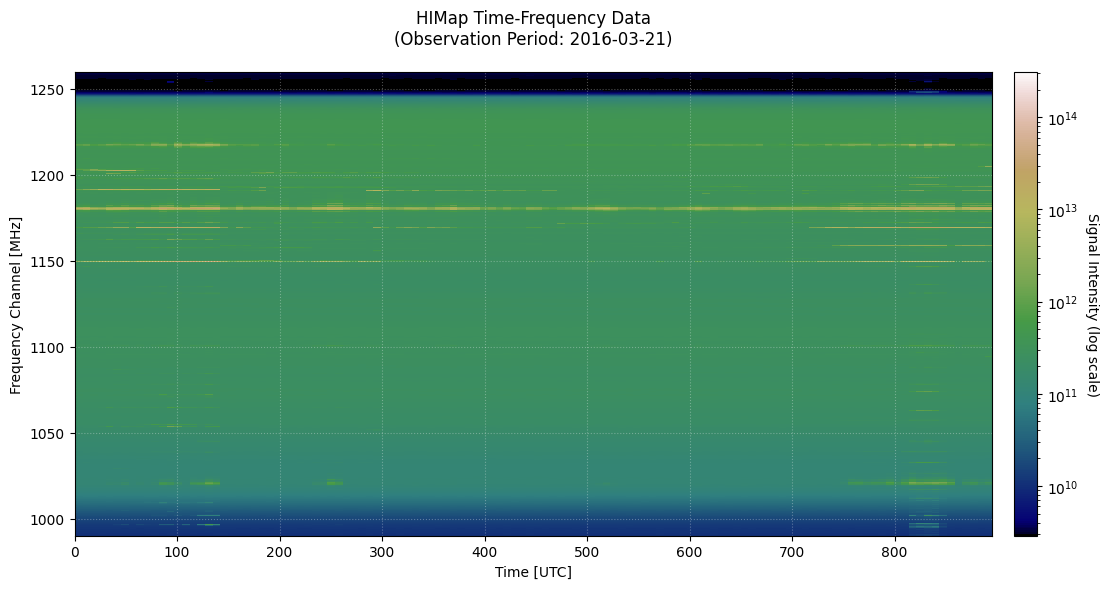

In [1]:
# File handling for HDF5 format (used for large datasets)
import h5py

# Matplotlib for plotting and visualization
import matplotlib
import matplotlib.pyplot as plt

# HTTP requests to fetch data from web APIs or URLs
import requests
from io import BytesIO

# -----------------------------------------------------------------------------
# Data Download and Processing
# -----------------------------------------------------------------------------

# URL of the HDF5 file (this link can be replaced with other data links from ETH Zurich's website: https://people.phys.ethz.ch/~ipa/cosmo/bgs_example_data/2016/03/21/)

url = "https://people.phys.ethz.ch/~ipa/cosmo/bgs_example_data/2016/03/21/HIMap_RSG7M_A1_24_MP_PXX_Z0_C0-M9703A_DPUA_20160321_074402.h5"

try:
    # Download and verify the file
    print("Downloading data...")
    response = requests.get(url)
    response.raise_for_status()

    # Load into memory and open HDF5
    with h5py.File(BytesIO(response.content), "r") as fp:
        print("\nFile structure (keys):", list(fp.keys()))

        # Extract data
        tod = fp["P/Phase1"][()]
        time = fp["TIME"][()]
        print(f"Data shape: {tod.shape}, Time points: {len(time)}")

except requests.exceptions.RequestException as e:
    print(f"\nDownload failed: {e}")
    exit(1)
except KeyError as e:
    print(f"\nMissing expected dataset: {e}")
    exit(1)
except Exception as e:
    print(f"\nUnexpected error: {e}")
    exit(1)

# -----------------------------------------------------------------------------
# Data Visualization
# -----------------------------------------------------------------------------

print("\nGenerating plot...")
plt.figure(figsize=(12, 6))

# Main plot with improved settings
img = plt.imshow(
    tod,
    aspect="auto",
    extent=(time[0], time[-1], 990, 1260),
    cmap="gist_earth",
    norm=matplotlib.colors.LogNorm(vmin=max(tod.min(), 1e-6), vmax=tod.max()),  # Ensures positive values
    interpolation='nearest'  # Clearer display for discrete data
)

# Enhanced formatting
cbar = plt.colorbar(img, pad=0.02)
cbar.set_label("Signal Intensity (log scale)", rotation=270, labelpad=15)

plt.xlabel("Time [UTC]")
plt.ylabel("Frequency Channel [MHz]")
plt.title("HIMap Time-Frequency Data\n(Observation Period: 2016-03-21)", pad=20)

# Add grid and adjust layout
plt.grid(visible=True, which='both', axis='both',
         linestyle=':', alpha=0.3, color='white')
plt.tight_layout()

print("Displaying plot...")
plt.show()